In [1]:
import pandas as pd

# Load the uploaded CSV file
file_path = "Data/Data_clean/Comments_clean.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()

,ID Post,User Name,Comments,Sentiments
0,1,Yanise Yanise,سلام عليكم ورحمة لديا مشكلة تعبئة بدات تنقص قل...,Negatif
1,1,Jj Kie,عام انتم بخير,Positif
2,1,Sakou Younes,عام وانتم بخير,Positif
3,1,راني نعاني,عام وحنا بخير,Positif
4,1,أحمد فيراس,حب,Positif


In [2]:
from sklearn.preprocessing import LabelEncoder

# Supprimer les lignes avec commentaires manquants
df = df.dropna(subset=["Comments"])

# Encodage des étiquettes de sentiments
label_encoder = LabelEncoder()
df["Sentiments_encoded"] = label_encoder.fit_transform(df["Sentiments"])

# Séparer les données en variables d'entrée (X) et cible (y)
X = df["Comments"]
y = df["Sentiments_encoded"]

In [3]:
from sklearn.model_selection import train_test_split

# Division en jeu d'entraînement et de test (80% pour train+validation, 20% pour test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Division en jeu d'entraînement et de validation (70% pour train, 10% pour validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)  # 0.125 * 0.8 = 0.1

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Vectorisation
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

X_train_count = count_vectorizer.fit_transform(X_train)
X_val_count = count_vectorizer.transform(X_val)
X_test_count = count_vectorizer.transform(X_test)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Afficher les dimensions des matrices vectorisées
{
    "CountVectorizer train shape": X_train_count.shape,
    "CountVectorizer val shape": X_val_count.shape,
    "CountVectorizer test shape": X_test_count.shape,
    "TF-IDF train shape": X_train_tfidf.shape,
    "TF-IDF val shape": X_val_tfidf.shape,
    "TF-IDF test shape": X_test_tfidf.shape,
    "Classes": label_encoder.classes_
}

{'CountVectorizer train shape': (2531, 4671),
 'CountVectorizer val shape': (362, 4671),
 'CountVectorizer test shape': (724, 4671),
 'TF-IDF train shape': (2531, 4671),
 'TF-IDF val shape': (362, 4671),
 'TF-IDF test shape': (724, 4671),
 'Classes': array(['Negatif', 'Neutre', 'Positif'], dtype=object)}

In [5]:
df.head()

,ID Post,User Name,Comments,Sentiments,Sentiments_encoded
0,1,Yanise Yanise,سلام عليكم ورحمة لديا مشكلة تعبئة بدات تنقص قل...,Negatif,0
1,1,Jj Kie,عام انتم بخير,Positif,2
2,1,Sakou Younes,عام وانتم بخير,Positif,2
3,1,راني نعاني,عام وحنا بخير,Positif,2
4,1,أحمد فيراس,حب,Positif,2


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Rapport pour LogisticRegression avec CountVectorizer (test):
Accuracy pour LogisticRegression avec CountVectorizer: 0.86
              precision    recall  f1-score   support

     Negatif       0.88      0.76      0.82       170
      Neutre       0.78      0.88      0.82       251
     Positif       0.93      0.90      0.91       303

    accuracy                           0.86       724
   macro avg       0.86      0.85      0.85       724
weighted avg       0.86      0.86      0.86       724

Accuracy pour LogisticRegression avec CountVectorizer (validation): 0.86
              precision    recall  f1-score   support

     Negatif       0.88      0.83      0.86        78
      Neutre       0.77      0.84      0.80       110
     Positif       0.92      0.89      0.91       174

    accuracy                           0.86       362
   macro avg       0.86      0.85      0.85       362
weighted avg       0.87      0.86      0.86       362



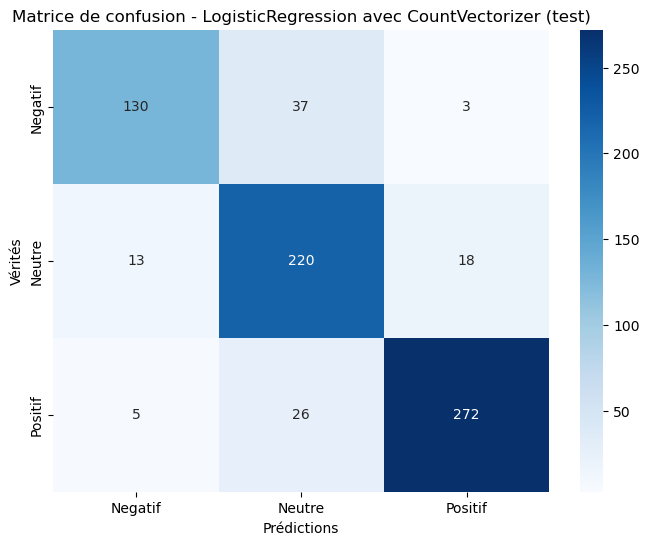

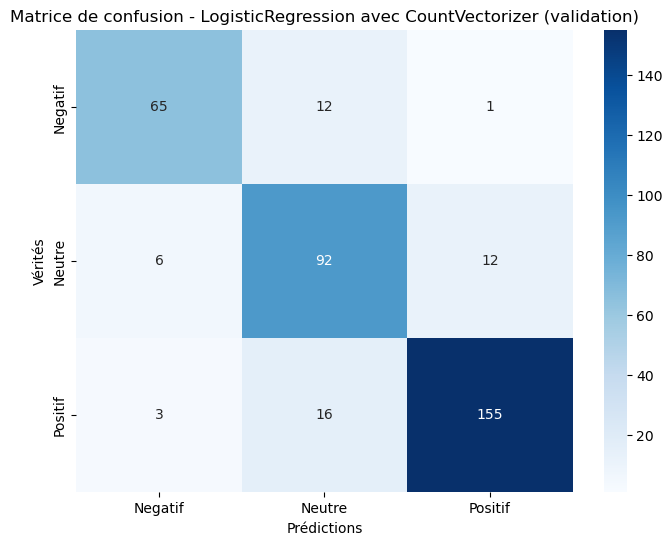

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Rapport pour LogisticRegression avec TF-IDF:
Accuracy pour LogisticRegression avec TF-IDF (test): 0.87
              precision    recall  f1-score   support

     Negatif       0.82      0.83      0.83       170
      Neutre       0.81      0.84      0.83       251
     Positif       0.94      0.91      0.92       303

    accuracy                           0.87       724
   macro avg       0.86      0.86      0.86       724
weighted avg       0.87      0.87      0.87       724

Accuracy pour LogisticRegression avec TF-IDF (validation): 0.87
              precision    recall  f1-score   support

     Negatif       0.86      0.88      0.87        78
      Neutre       0.80      0.83      0.81       110
     Positif       0.93      0.90      0.91       174

    accuracy                           0.87       362
   macro avg       0.86      0.87      0.87       362
weighted avg       0.87      0.87      0.87       362



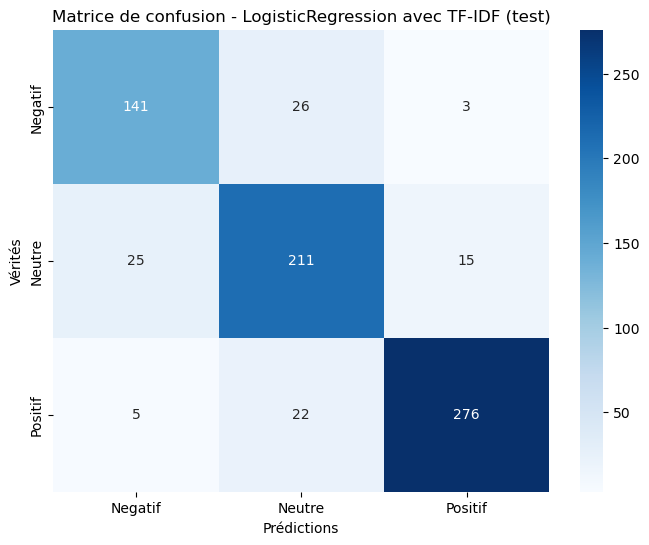

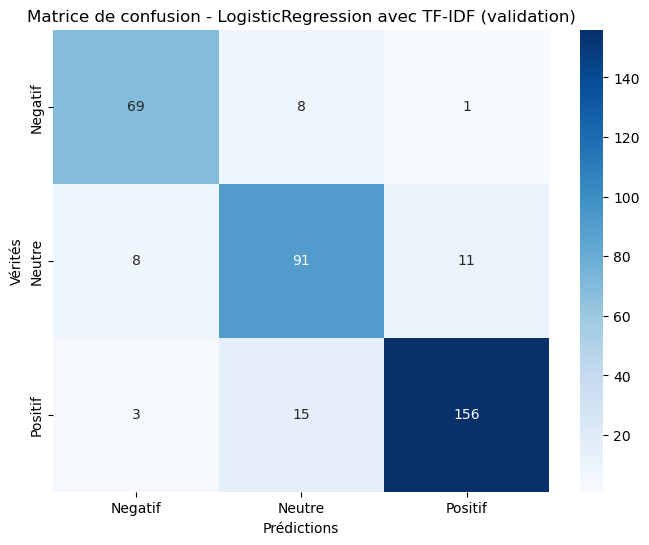

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Entraînement et évaluation avec CountVectorizer
logistic_model_count = LogisticRegression(C=3, max_iter=1000, solver='liblinear', multi_class='auto', class_weight='balanced', penalty='l2')
logistic_model_count.fit(X_train_count, y_train)

# Prédictions sur le jeu de test
y_pred_count = logistic_model_count.predict(X_test_count)

# Prédictions sur le jeu de validation
y_val_pred_count = logistic_model_count.predict(X_val_count)

# Rapport complet pour CountVectorizer
print("Rapport pour LogisticRegression avec CountVectorizer (test):")
accuracy_count = accuracy_score(y_test, y_pred_count)
print(f"Accuracy pour LogisticRegression avec CountVectorizer: {accuracy_count:.2f}")
print(classification_report(y_test, y_pred_count, target_names=label_encoder.classes_))

# Validation avec CountVectorizer
accuracy_val_count = accuracy_score(y_val, y_val_pred_count)
print(f"Accuracy pour LogisticRegression avec CountVectorizer (validation): {accuracy_val_count:.2f}")
print(classification_report(y_val, y_val_pred_count, target_names=label_encoder.classes_))

# Matrice de confusion pour CountVectorizer (test)
conf_matrix_count = confusion_matrix(y_test, y_pred_count)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_count, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - LogisticRegression avec CountVectorizer (test)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Matrice de confusion pour CountVectorizer (validation)
conf_matrix_val_count = confusion_matrix(y_val, y_val_pred_count)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_count, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - LogisticRegression avec CountVectorizer (validation)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Entraînement et évaluation avec TF-IDF
logistic_model_tfidf = LogisticRegression(C=10, max_iter=1000, solver='liblinear', multi_class='auto', class_weight='balanced', penalty='l2')
logistic_model_tfidf.fit(X_train_tfidf, y_train)

# Prédictions sur le jeu de test
y_pred_tfidf = logistic_model_tfidf.predict(X_test_tfidf)

# Prédictions sur le jeu de validation
y_val_pred_tfidf = logistic_model_tfidf.predict(X_val_tfidf)

# Rapport complet pour TF-IDF
print("Rapport pour LogisticRegression avec TF-IDF:")
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f"Accuracy pour LogisticRegression avec TF-IDF (test): {accuracy_tfidf:.2f}")
print(classification_report(y_test, y_pred_tfidf, target_names=label_encoder.classes_))

# Validation avec TF-IDF
accuracy_val_tfidf = accuracy_score(y_val, y_val_pred_tfidf)
print(f"Accuracy pour LogisticRegression avec TF-IDF (validation): {accuracy_val_tfidf:.2f}")
print(classification_report(y_val, y_val_pred_tfidf, target_names=label_encoder.classes_))

# Matrice de confusion pour TF-IDF (test)
conf_matrix_tfidf = confusion_matrix(y_test, y_pred_tfidf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - LogisticRegression avec TF-IDF (test)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Matrice de confusion pour TF-IDF (validation)
conf_matrix_val_tfidf = confusion_matrix(y_val, y_val_pred_tfidf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_tfidf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - LogisticRegression avec TF-IDF (validation)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

Rapport pour SVC avec CountVectorizer:
Accuracy pour SVC avec CountVectorizer (test): 0.84
              precision    recall  f1-score   support

     Negatif       0.80      0.79      0.80       170
      Neutre       0.77      0.82      0.80       251
     Positif       0.92      0.88      0.90       303

    accuracy                           0.84       724
   macro avg       0.83      0.83      0.83       724
weighted avg       0.84      0.84      0.84       724

Accuracy pour SVC avec CountVectorizer (validation): 0.85
              precision    recall  f1-score   support

     Negatif       0.87      0.83      0.85        78
      Neutre       0.74      0.84      0.79       110
     Positif       0.93      0.87      0.90       174

    accuracy                           0.85       362
   macro avg       0.84      0.85      0.84       362
weighted avg       0.86      0.85      0.85       362



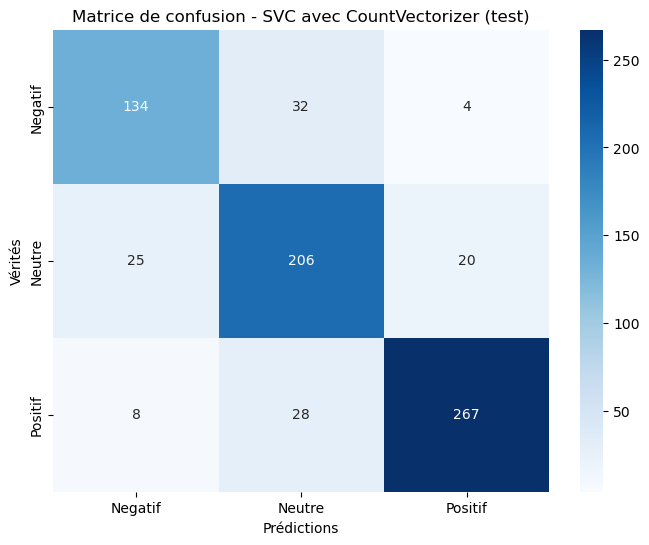

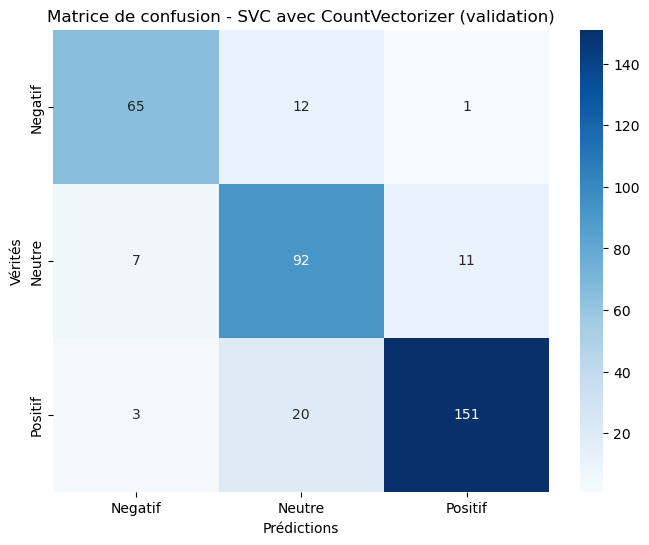

Rapport pour SVC avec TF-IDF:
Accuracy pour SVC avec TF-IDF (test): 0.87
              precision    recall  f1-score   support

     Negatif       0.81      0.85      0.83       170
      Neutre       0.82      0.83      0.82       251
     Positif       0.94      0.91      0.92       303

    accuracy                           0.87       724
   macro avg       0.86      0.86      0.86       724
weighted avg       0.87      0.87      0.87       724

Accuracy pour SVC avec TF-IDF (validation): 0.88
              precision    recall  f1-score   support

     Negatif       0.86      0.88      0.87        78
      Neutre       0.80      0.85      0.82       110
     Positif       0.95      0.89      0.92       174

    accuracy                           0.88       362
   macro avg       0.87      0.88      0.87       362
weighted avg       0.88      0.88      0.88       362



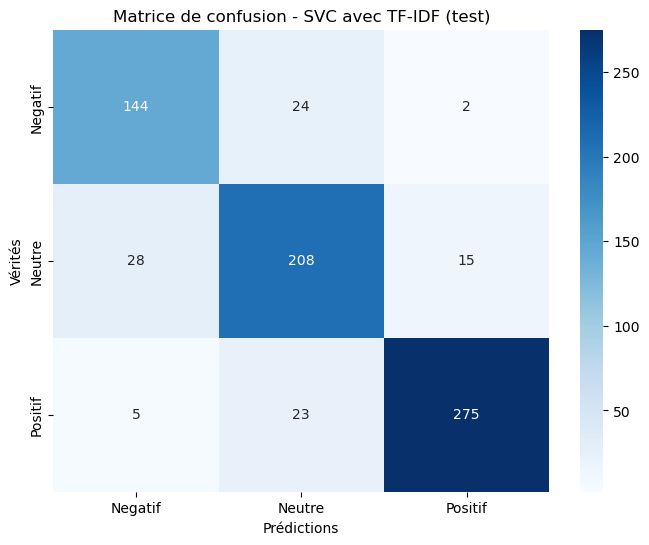

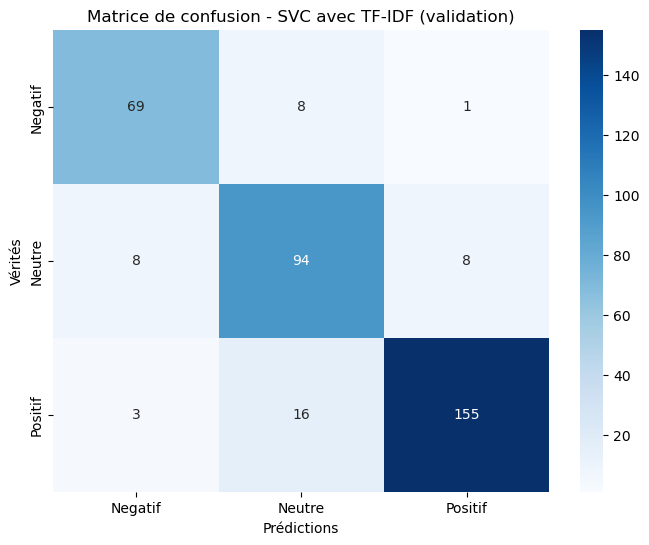

In [7]:
from sklearn.svm import SVC

# Entraînement et évaluation avec CountVectorizer
svc_model_count = SVC(C=3, kernel='sigmoid', class_weight='balanced', gamma='scale')
svc_model_count.fit(X_train_count, y_train)

# Prédictions sur le jeu de test
y_pred_count_svc = svc_model_count.predict(X_test_count)

# Prédictions sur le jeu de validation
y_val_pred_count_svc = svc_model_count.predict(X_val_count)

# Rapport complet pour SVC avec CountVectorizer
print("Rapport pour SVC avec CountVectorizer:")
# Accuracy pour CountVectorizer (test)
accuracy_count_svc = accuracy_score(y_test, y_pred_count_svc)
print(f"Accuracy pour SVC avec CountVectorizer (test): {accuracy_count_svc:.2f}")
print(classification_report(y_test, y_pred_count_svc, target_names=label_encoder.classes_))

# Accuracy pour CountVectorizer (validation)
accuracy_val_count_svc = accuracy_score(y_val, y_val_pred_count_svc)
print(f"Accuracy pour SVC avec CountVectorizer (validation): {accuracy_val_count_svc:.2f}")
print(classification_report(y_val, y_val_pred_count_svc, target_names=label_encoder.classes_))

# Matrice de confusion pour SVC avec CountVectorizer (test)
conf_matrix_count_svc = confusion_matrix(y_test, y_pred_count_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_count_svc, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - SVC avec CountVectorizer (test)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Matrice de confusion pour SVC avec CountVectorizer (validation)
conf_matrix_val_count_svc = confusion_matrix(y_val, y_val_pred_count_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_count_svc, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - SVC avec CountVectorizer (validation)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Entraînement et évaluation avec TF-IDF
svc_model_tfidf = SVC(C=1, kernel='sigmoid', class_weight='balanced', gamma='scale')
svc_model_tfidf.fit(X_train_tfidf, y_train)

# Prédictions sur le jeu de test
y_pred_tfidf_svc = svc_model_tfidf.predict(X_test_tfidf)

# Prédictions sur le jeu de validation
y_val_pred_tfidf_svc = svc_model_tfidf.predict(X_val_tfidf)

# Rapport complet pour SVC avec TF-IDF
print("Rapport pour SVC avec TF-IDF:")
# Accuracy pour TF-IDF (test)
accuracy_tfidf_svc = accuracy_score(y_test, y_pred_tfidf_svc)
print(f"Accuracy pour SVC avec TF-IDF (test): {accuracy_tfidf_svc:.2f}")
print(classification_report(y_test, y_pred_tfidf_svc, target_names=label_encoder.classes_))

# Accuracy pour TF-IDF (validation)
accuracy_val_tfidf_svc = accuracy_score(y_val, y_val_pred_tfidf_svc)
print(f"Accuracy pour SVC avec TF-IDF (validation): {accuracy_val_tfidf_svc:.2f}")
print(classification_report(y_val, y_val_pred_tfidf_svc, target_names=label_encoder.classes_))

# Matrice de confusion pour SVC avec TF-IDF (test)
conf_matrix_tfidf_svc = confusion_matrix(y_test, y_pred_tfidf_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf_svc, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - SVC avec TF-IDF (test)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Matrice de confusion pour SVC avec TF-IDF (validation)
conf_matrix_val_tfidf_svc = confusion_matrix(y_val, y_val_pred_tfidf_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_tfidf_svc, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - SVC avec TF-IDF (validation)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

Rapport pour DecisionTreeClassifier avec CountVectorizer (test):
Accuracy pour DecisionTreeClassifier avec CountVectorizer (test): 0.81
              precision    recall  f1-score   support

     Negatif       0.80      0.76      0.78       170
      Neutre       0.70      0.84      0.76       251
     Positif       0.94      0.80      0.86       303

    accuracy                           0.81       724
   macro avg       0.81      0.80      0.80       724
weighted avg       0.82      0.81      0.81       724

Rapport pour DecisionTreeClassifier avec CountVectorizer (validation):
Accuracy pour DecisionTreeClassifier avec CountVectorizer (validation): 0.81
              precision    recall  f1-score   support

     Negatif       0.76      0.83      0.80        78
      Neutre       0.68      0.82      0.74       110
     Positif       0.95      0.79      0.87       174

    accuracy                           0.81       362
   macro avg       0.80      0.81      0.80       362
weighted 

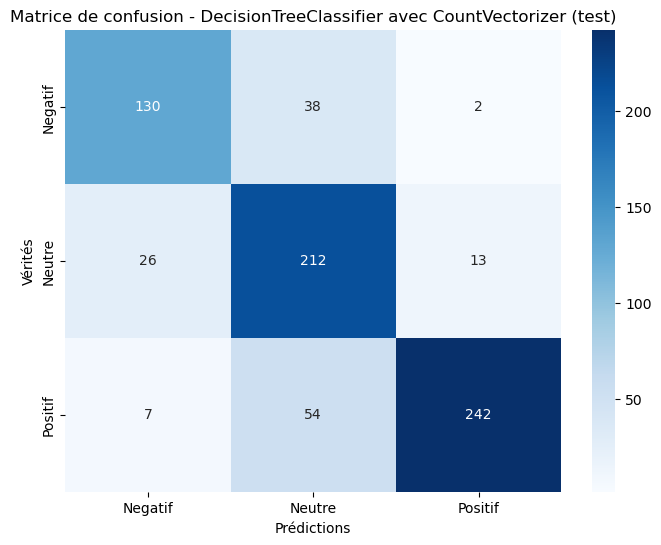

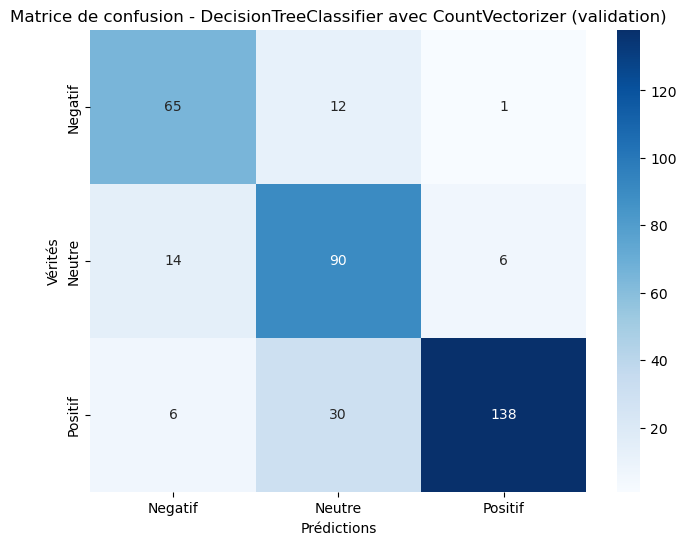

Rapport pour DecisionTreeClassifier avec TF-IDF (test):
Accuracy pour DecisionTreeClassifier avec TF-IDF (test): 0.81
              precision    recall  f1-score   support

     Negatif       0.79      0.72      0.75       170
      Neutre       0.71      0.83      0.76       251
     Positif       0.93      0.84      0.88       303

    accuracy                           0.81       724
   macro avg       0.81      0.80      0.80       724
weighted avg       0.82      0.81      0.81       724

Rapport pour DecisionTreeClassifier avec TF-IDF (validation):
Accuracy pour DecisionTreeClassifier avec TF-IDF (validation): 0.81
              precision    recall  f1-score   support

     Negatif       0.76      0.82      0.79        78
      Neutre       0.70      0.75      0.72       110
     Positif       0.93      0.85      0.89       174

    accuracy                           0.81       362
   macro avg       0.80      0.81      0.80       362
weighted avg       0.82      0.81      0.82  

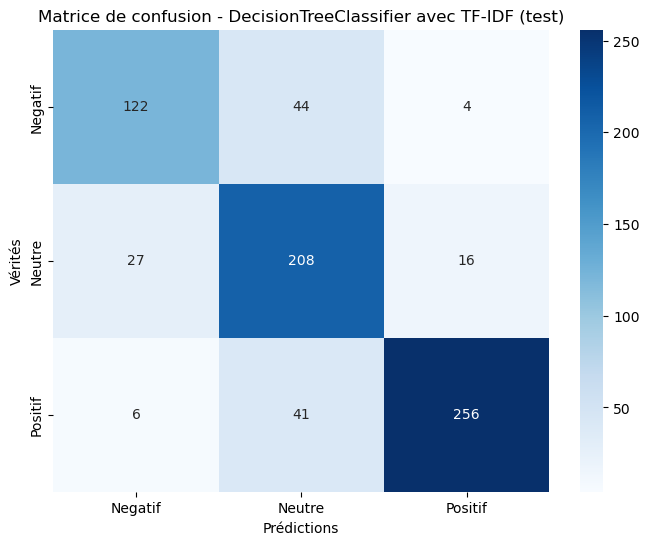

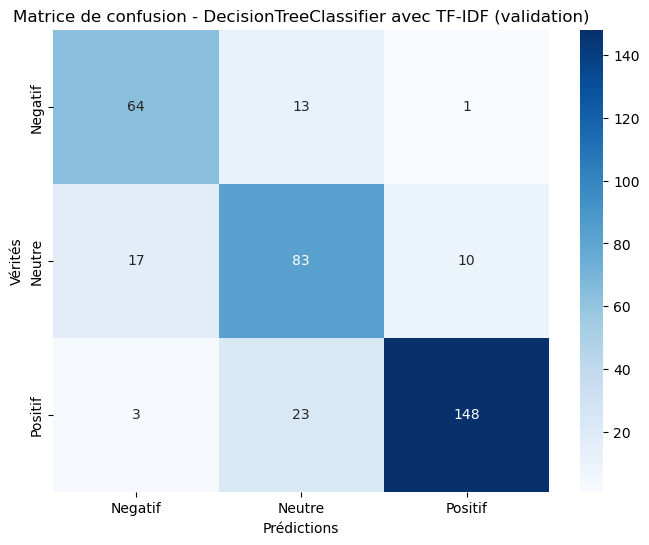

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Entraînement et évaluation avec CountVectorizer
decision_tree_model_count = DecisionTreeClassifier(class_weight='balanced', criterion='gini')
decision_tree_model_count.fit(X_train_count, y_train)

# Prédictions sur le jeu de test
y_pred_count_dt = decision_tree_model_count.predict(X_test_count)

# Prédictions sur le jeu de validation
y_val_pred_count_dt = decision_tree_model_count.predict(X_val_count)

# Rapport complet pour DecisionTreeClassifier avec CountVectorizer (test)
print("Rapport pour DecisionTreeClassifier avec CountVectorizer (test):")
accuracy_count_dt = accuracy_score(y_test, y_pred_count_dt)
print(f"Accuracy pour DecisionTreeClassifier avec CountVectorizer (test): {accuracy_count_dt:.2f}")
print(classification_report(y_test, y_pred_count_dt, target_names=label_encoder.classes_))

# Rapport complet pour DecisionTreeClassifier avec CountVectorizer (validation)
print("Rapport pour DecisionTreeClassifier avec CountVectorizer (validation):")
accuracy_val_count_dt = accuracy_score(y_val, y_val_pred_count_dt)
print(f"Accuracy pour DecisionTreeClassifier avec CountVectorizer (validation): {accuracy_val_count_dt:.2f}")
print(classification_report(y_val, y_val_pred_count_dt, target_names=label_encoder.classes_))

# Matrice de confusion pour DecisionTreeClassifier avec CountVectorizer (test)
conf_matrix_count_dt = confusion_matrix(y_test, y_pred_count_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_count_dt, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - DecisionTreeClassifier avec CountVectorizer (test)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Matrice de confusion pour DecisionTreeClassifier avec CountVectorizer (validation)
conf_matrix_val_count_dt = confusion_matrix(y_val, y_val_pred_count_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_count_dt, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - DecisionTreeClassifier avec CountVectorizer (validation)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Entraînement et évaluation avec TF-IDF
decision_tree_model_tfidf = DecisionTreeClassifier(class_weight='balanced', criterion='gini')
decision_tree_model_tfidf.fit(X_train_tfidf, y_train)

# Prédictions sur le jeu de test
y_pred_tfidf_dt = decision_tree_model_tfidf.predict(X_test_tfidf)

# Prédictions sur le jeu de validation
y_val_pred_tfidf_dt = decision_tree_model_tfidf.predict(X_val_tfidf)

# Rapport complet pour DecisionTreeClassifier avec TF-IDF (test)
print("Rapport pour DecisionTreeClassifier avec TF-IDF (test):")
accuracy_tfidf_dt = accuracy_score(y_test, y_pred_tfidf_dt)
print(f"Accuracy pour DecisionTreeClassifier avec TF-IDF (test): {accuracy_tfidf_dt:.2f}")
print(classification_report(y_test, y_pred_tfidf_dt, target_names=label_encoder.classes_))

# Rapport complet pour DecisionTreeClassifier avec TF-IDF (validation)
print("Rapport pour DecisionTreeClassifier avec TF-IDF (validation):")
accuracy_val_tfidf_dt = accuracy_score(y_val, y_val_pred_tfidf_dt)
print(f"Accuracy pour DecisionTreeClassifier avec TF-IDF (validation): {accuracy_val_tfidf_dt:.2f}")
print(classification_report(y_val, y_val_pred_tfidf_dt, target_names=label_encoder.classes_))

# Matrice de confusion pour DecisionTreeClassifier avec TF-IDF (test)
conf_matrix_tfidf_dt = confusion_matrix(y_test, y_pred_tfidf_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf_dt, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - DecisionTreeClassifier avec TF-IDF (test)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Matrice de confusion pour DecisionTreeClassifier avec TF-IDF (validation)
conf_matrix_val_tfidf_dt = confusion_matrix(y_val, y_val_pred_tfidf_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_tfidf_dt, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - DecisionTreeClassifier avec TF-IDF (validation)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

Rapport pour MultinomialNB avec CountVectorizer (test):
Accuracy pour MultinomialNB avec CountVectorizer (test): 0.85
              precision    recall  f1-score   support

     Negatif       0.78      0.84      0.81       170
      Neutre       0.81      0.77      0.79       251
     Positif       0.91      0.91      0.91       303

    accuracy                           0.85       724
   macro avg       0.83      0.84      0.84       724
weighted avg       0.85      0.85      0.85       724

Rapport pour MultinomialNB avec CountVectorizer (validation):
Accuracy pour MultinomialNB avec CountVectorizer (validation): 0.88
              precision    recall  f1-score   support

     Negatif       0.87      0.88      0.88        78
      Neutre       0.83      0.81      0.82       110
     Positif       0.91      0.93      0.92       174

    accuracy                           0.88       362
   macro avg       0.87      0.87      0.87       362
weighted avg       0.88      0.88      0.88  

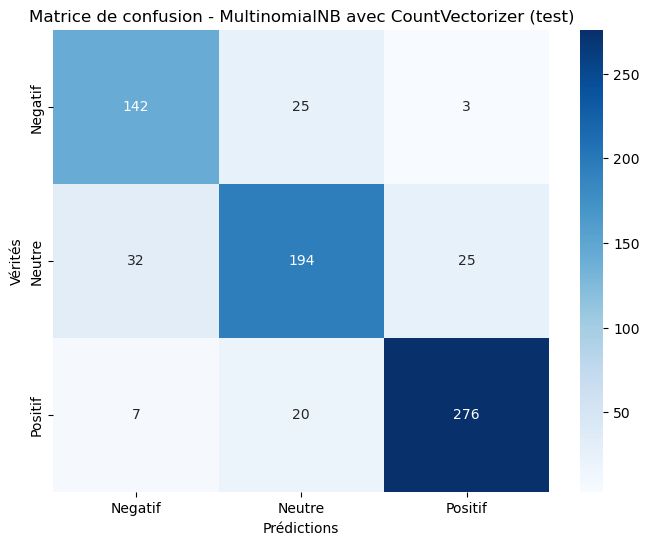

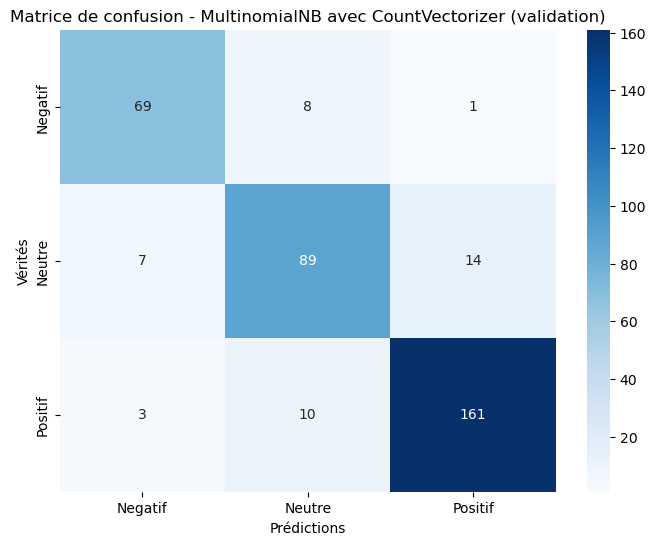

Rapport pour MultinomialNB avec TF-IDF (test):
Accuracy pour MultinomialNB avec TF-IDF (test): 0.85
              precision    recall  f1-score   support

     Negatif       0.83      0.79      0.81       170
      Neutre       0.80      0.81      0.80       251
     Positif       0.91      0.92      0.92       303

    accuracy                           0.85       724
   macro avg       0.85      0.84      0.84       724
weighted avg       0.85      0.85      0.85       724

Rapport pour MultinomialNB avec TF-IDF (validation):
Accuracy pour MultinomialNB avec TF-IDF (validation): 0.88
              precision    recall  f1-score   support

     Negatif       0.91      0.86      0.88        78
      Neutre       0.82      0.82      0.82       110
     Positif       0.92      0.94      0.93       174

    accuracy                           0.88       362
   macro avg       0.88      0.87      0.88       362
weighted avg       0.88      0.88      0.88       362



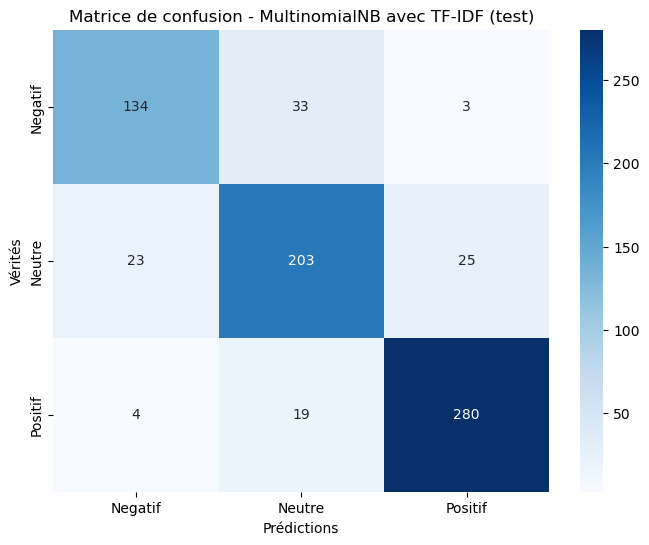

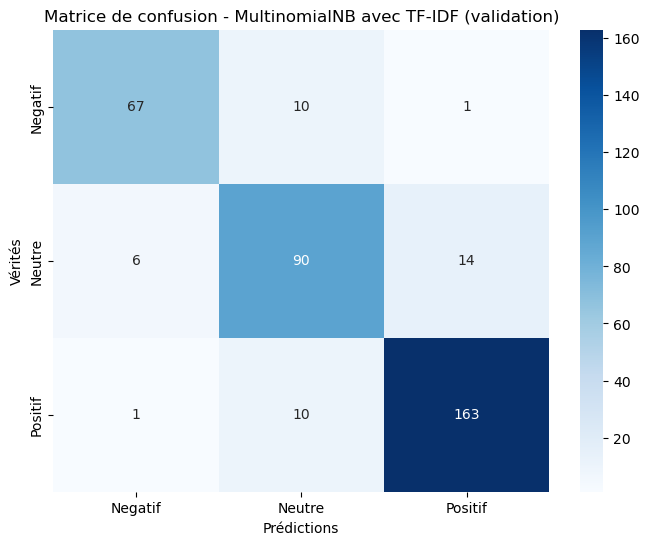

In [9]:
from sklearn.naive_bayes import MultinomialNB

# Entraînement et évaluation avec CountVectorizer
nb_model_count = MultinomialNB(alpha=0.5, fit_prior=True, class_prior=[4.2, 5.6, 5.5])
nb_model_count.fit(X_train_count, y_train)

# Prédictions sur le jeu de test
y_pred_count_nb = nb_model_count.predict(X_test_count)

# Prédictions sur le jeu de validation
y_val_pred_count_nb = nb_model_count.predict(X_val_count)

# Rapport complet pour MultinomialNB avec CountVectorizer (test)
print("Rapport pour MultinomialNB avec CountVectorizer (test):")
accuracy_count_nb = accuracy_score(y_test, y_pred_count_nb)
print(f"Accuracy pour MultinomialNB avec CountVectorizer (test): {accuracy_count_nb:.2f}")
print(classification_report(y_test, y_pred_count_nb, target_names=label_encoder.classes_))

# Rapport complet pour MultinomialNB avec CountVectorizer (validation)
print("Rapport pour MultinomialNB avec CountVectorizer (validation):")
accuracy_val_count_nb = accuracy_score(y_val, y_val_pred_count_nb)
print(f"Accuracy pour MultinomialNB avec CountVectorizer (validation): {accuracy_val_count_nb:.2f}")
print(classification_report(y_val, y_val_pred_count_nb, target_names=label_encoder.classes_))

# Matrice de confusion pour MultinomialNB avec CountVectorizer (test)
conf_matrix_count_nb = confusion_matrix(y_test, y_pred_count_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_count_nb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - MultinomialNB avec CountVectorizer (test)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Matrice de confusion pour MultinomialNB avec CountVectorizer (validation)
conf_matrix_val_count_nb = confusion_matrix(y_val, y_val_pred_count_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_count_nb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - MultinomialNB avec CountVectorizer (validation)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Entraînement et évaluation avec TF-IDF
nb_model_tfidf = MultinomialNB(alpha=1, fit_prior=True, class_prior=[4.2, 5.6, 5.5])
nb_model_tfidf.fit(X_train_tfidf, y_train)

# Prédictions sur le jeu de test
y_pred_tfidf_nb = nb_model_tfidf.predict(X_test_tfidf)

# Prédictions sur le jeu de validation
y_val_pred_tfidf_nb = nb_model_tfidf.predict(X_val_tfidf)

# Rapport complet pour MultinomialNB avec TF-IDF (test)
print("Rapport pour MultinomialNB avec TF-IDF (test):")
accuracy_tfidf_nb = accuracy_score(y_test, y_pred_tfidf_nb)
print(f"Accuracy pour MultinomialNB avec TF-IDF (test): {accuracy_tfidf_nb:.2f}")
print(classification_report(y_test, y_pred_tfidf_nb, target_names=label_encoder.classes_))

# Rapport complet pour MultinomialNB avec TF-IDF (validation)
print("Rapport pour MultinomialNB avec TF-IDF (validation):")
accuracy_val_tfidf_nb = accuracy_score(y_val, y_val_pred_tfidf_nb)
print(f"Accuracy pour MultinomialNB avec TF-IDF (validation): {accuracy_val_tfidf_nb:.2f}")
print(classification_report(y_val, y_val_pred_tfidf_nb, target_names=label_encoder.classes_))

# Matrice de confusion pour MultinomialNB avec TF-IDF (test)
conf_matrix_tfidf_nb = confusion_matrix(y_test, y_pred_tfidf_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf_nb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - MultinomialNB avec TF-IDF (test)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Matrice de confusion pour MultinomialNB avec TF-IDF (validation)
conf_matrix_val_tfidf_nb = confusion_matrix(y_val, y_val_pred_tfidf_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_tfidf_nb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - MultinomialNB avec TF-IDF (validation)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1005
[LightGBM] [Info] Number of data points in the train set: 2531, number of used features: 434
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Rapport pour LGBMClassifier avec CountVectorizer (test):
Accuracy pour LGBMClassifier avec CountVectorizer (test): 0.83
              precision    recall  f1-score   support

     Negatif       0.83      0.77      0.80       170
      Neutre       0.75      0.85      0.80       251
     Positif       0.93      0.85      0.89       303

    accuracy                           0.83       724
   macro avg       0.84      0.83      0.83       724
weighted avg       0.84      0.83      

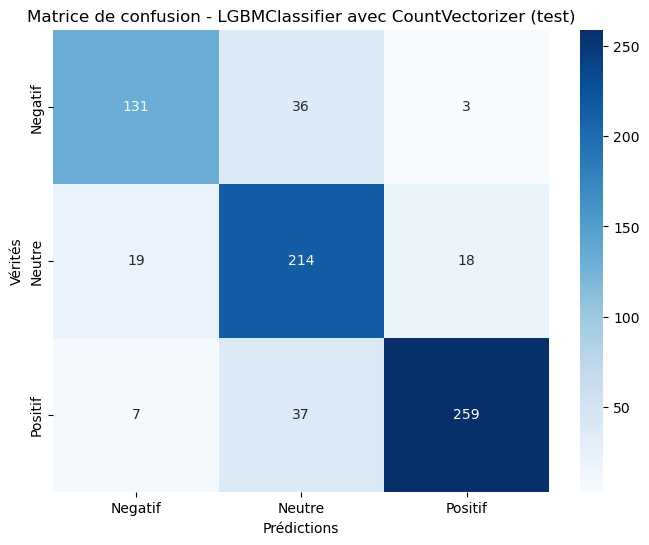

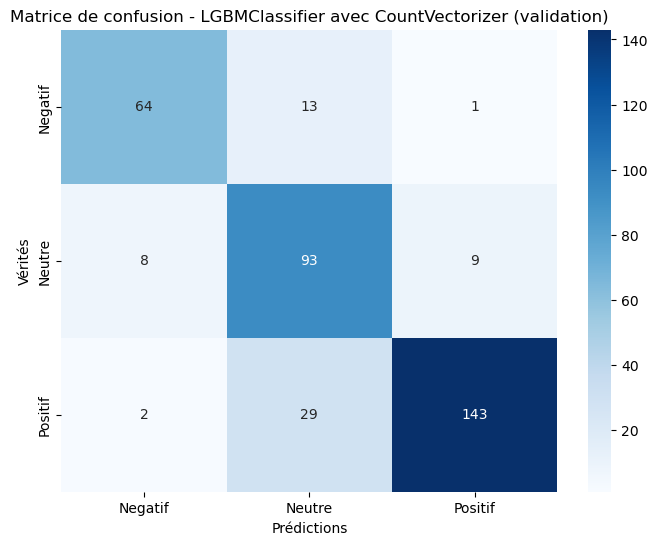

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004613 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2871
[LightGBM] [Info] Number of data points in the train set: 2531, number of used features: 434
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Rapport pour LGBMClassifier avec TF-IDF (test):
Accuracy pour LGBMClassifier avec TF-IDF (test): 0.82
              precision    recall  f1-score   support

     Negatif       0.83      0.75      0.79       170
      Neutre       0.73      0.86      0.79       251
     Positif       0.93      0.83      0.88       303

    accuracy                           0.82       724
   macro avg       0.83      0.81      0.82       724
weighted avg       0.83      0.82      0.83       724

Rapport pour LGBMClassifier avec TF-IDF (validation):
Accuracy pou

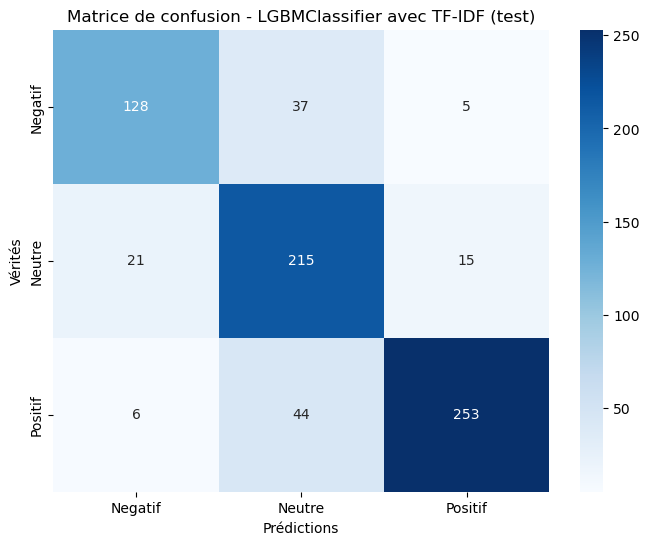

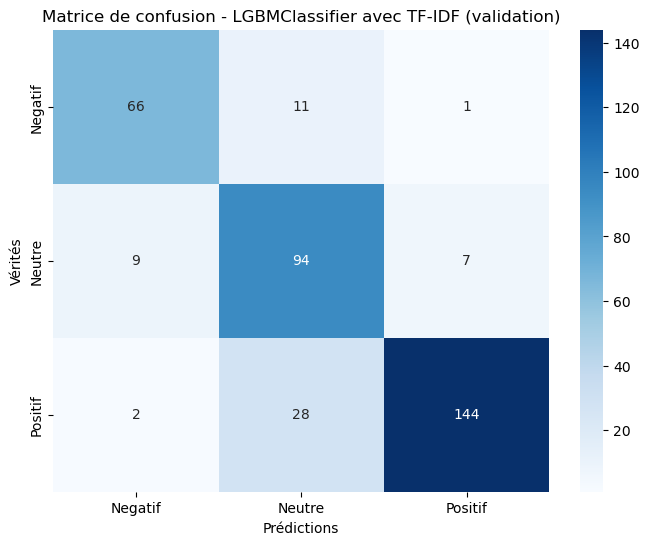

In [10]:
from lightgbm import LGBMClassifier
import numpy as np

# Entraînement et évaluation avec CountVectorizer
lgbm_model_count = LGBMClassifier(learning_rate=0.05, num_leaves=20, n_estimators=200, class_weight='balanced', max_depth=-1, min_child_samples=5)
lgbm_model_count.fit(X_train_count.astype(np.float32), y_train)

# Prédictions sur le jeu de test
y_pred_count_lgbm = lgbm_model_count.predict(X_test_count.astype(np.float32))

# Prédictions sur le jeu de validation
y_val_pred_count_lgbm = lgbm_model_count.predict(X_val_count.astype(np.float32))

# Rapport complet pour LGBMClassifier avec CountVectorizer (test)
print("Rapport pour LGBMClassifier avec CountVectorizer (test):")
accuracy_count_lgbm = accuracy_score(y_test, y_pred_count_lgbm)
print(f"Accuracy pour LGBMClassifier avec CountVectorizer (test): {accuracy_count_lgbm:.2f}")
print(classification_report(y_test, y_pred_count_lgbm, target_names=label_encoder.classes_))

# Rapport complet pour LGBMClassifier avec CountVectorizer (validation)
print("Rapport pour LGBMClassifier avec CountVectorizer (validation):")
accuracy_val_count_lgbm = accuracy_score(y_val, y_val_pred_count_lgbm)
print(f"Accuracy pour LGBMClassifier avec CountVectorizer (validation): {accuracy_val_count_lgbm:.2f}")
print(classification_report(y_val, y_val_pred_count_lgbm, target_names=label_encoder.classes_))

# Matrice de confusion pour LGBMClassifier avec CountVectorizer (test)
conf_matrix_count_lgbm = confusion_matrix(y_test, y_pred_count_lgbm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_count_lgbm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - LGBMClassifier avec CountVectorizer (test)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Matrice de confusion pour LGBMClassifier avec CountVectorizer (validation)
conf_matrix_val_count_lgbm = confusion_matrix(y_val, y_val_pred_count_lgbm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_count_lgbm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - LGBMClassifier avec CountVectorizer (validation)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Entraînement et évaluation avec TF-IDF
lgbm_model_tfidf = LGBMClassifier(learning_rate=0.05, num_leaves=20, n_estimators=200, class_weight='balanced', max_depth=-1, min_child_samples=5)
lgbm_model_tfidf.fit(X_train_tfidf.astype(np.float32), y_train)

# Prédictions sur le jeu de test
y_pred_tfidf_lgbm = lgbm_model_tfidf.predict(X_test_tfidf.astype(np.float32))

# Prédictions sur le jeu de validation
y_val_pred_tfidf_lgbm = lgbm_model_tfidf.predict(X_val_tfidf.astype(np.float32))

# Rapport complet pour LGBMClassifier avec TF-IDF (test)
print("Rapport pour LGBMClassifier avec TF-IDF (test):")
accuracy_tfidf_lgbm = accuracy_score(y_test, y_pred_tfidf_lgbm)
print(f"Accuracy pour LGBMClassifier avec TF-IDF (test): {accuracy_tfidf_lgbm:.2f}")
print(classification_report(y_test, y_pred_tfidf_lgbm, target_names=label_encoder.classes_))

# Rapport complet pour LGBMClassifier avec TF-IDF (validation)
print("Rapport pour LGBMClassifier avec TF-IDF (validation):")
accuracy_val_tfidf_lgbm = accuracy_score(y_val, y_val_pred_tfidf_lgbm)
print(f"Accuracy pour LGBMClassifier avec TF-IDF (validation): {accuracy_val_tfidf_lgbm:.2f}")
print(classification_report(y_val, y_val_pred_tfidf_lgbm, target_names=label_encoder.classes_))

# Matrice de confusion pour LGBMClassifier avec TF-IDF (test)
conf_matrix_tfidf_lgbm = confusion_matrix(y_test, y_pred_tfidf_lgbm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf_lgbm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - LGBMClassifier avec TF-IDF (test)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Matrice de confusion pour LGBMClassifier avec TF-IDF (validation)
conf_matrix_val_tfidf_lgbm = confusion_matrix(y_val, y_val_pred_tfidf_lgbm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_tfidf_lgbm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - LGBMClassifier avec TF-IDF (validation)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()